In [82]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
#Load the data

with open(r'C:\Users\USER\Desktop\spotify2023\spotify.csv', 'r') as f:
    df = pd.read_csv(f)

In [84]:
#Preview the data

df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Nxde,(G)I-DLE,1,2022,10,17,430,6,170709584,14,...,136,E,Minor,73,65,91,4,0,48,18
1,Queencard,(G)I-DLE,1,2023,5,15,451,33,96273746,10,...,130,E,Minor,82,69,83,3,0,27,5
2,thought i was playing,"21 Savage, Gunna",2,2022,1,7,807,0,60680939,3,...,148,C#,Major,68,29,73,0,0,7,7
3,Mood (feat. Iann Dior),"24kgoldn, Iann Dior",2,2020,7,24,12854,0,1699402402,237,...,91,G,Minor,70,76,72,22,0,27,4
4,In Da Club,50 Cent,1,2002,1,1,30427,7,1202722675,235,...,90,F#,Minor,90,79,71,26,0,7,37


In [104]:
# Data Summary
data_summary = df.describe()

# Display the cleaned DataFrame without the index
df.reset_index(drop=True, inplace=True)

df.info()
df.head()

# Check for missing data again to verify that all null values have been replaced
missing_data = df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    ob

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_mode,season_released
0,Nxde,(G)I-DLE,1,2022,10,17,430,6,170709584,14,...,Minor,73,65,91,4,0,48,18,E Minor,Autumn
1,Queencard,(G)I-DLE,1,2023,5,15,451,33,96273746,10,...,Minor,82,69,83,3,0,27,5,E Minor,Spring
2,thought i was playing,"21 Savage, Gunna",2,2022,1,7,807,0,60680939,3,...,Major,68,29,73,0,0,7,7,C# Major,Winter
3,Mood (feat. Iann Dior),"24kgoldn, Iann Dior",2,2020,7,24,12854,0,1699402402,237,...,Minor,70,76,72,22,0,27,4,G Minor,Summer
4,In Da Club,50 Cent,1,2002,1,1,30427,7,1202722675,235,...,Minor,90,79,71,26,0,7,37,F# Minor,Winter


In [86]:
# Get the top 10 most streamed songs this year
# 1. Most Streamed Song
most_streamed_song = df[df['streams'] == df['streams'].max()]
most_streamed_song

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
858,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7


In [87]:
# Get the average energy of songs released by each artist
avg_energy_per_artist = df.groupby(['artist(s)_name', 'track_name'])['energy_%'].mean()

# Sort the average energy per artist by descending order
avg_energy_per_artist = avg_energy_per_artist.sort_values(ascending=False)

# Print the top 10 artists with the highest average energy
print(avg_energy_per_artist.head(10))

artist(s)_name                  track_name                           
Kordhell                        Murder In My Mind                        97.0
Bebe Rexha, David Guetta        I'm Good (Blue)                          97.0
dennis, MC Kevin o Chris        Tï¿½ï¿                                   96.0
PSY, Suga                       That That (prod. & feat. SUGA of BTS)    96.0
Israel & Rodolffo, Ana Castela  Bombonzinho - Ao Vivo                    95.0
Kenshi Yonezu                   KICK BACK                                94.0
Surf Curse                      Freaks                                   94.0
The Weeknd                      Every Angel is Terrifying                94.0
NewJeans                        Hype Boy                                 94.0
Ed Sheeran, Elton John          Merry Christmas                          94.0
Name: energy_%, dtype: float64


In [88]:
# Get the top 10 most acoustic songs
top_10_acoustic_songs = df.sort_values('acousticness_%', ascending=False).head(10)

# Print the top 10 most acoustic songs
print(top_10_acoustic_songs[['track_name', 'artist(s)_name', 'acousticness_%']].to_string(index=False))

                                             track_name        artist(s)_name  acousticness_%
                                       The Night We Met            Lord Huron              97
                                          Sweet Nothing          Taylor Swift              97
What Was I Made For? [From The Motion Picture "Barbie"]         Billie Eilish              96
                              LA FAMA (with The Weeknd)  The Weeknd, ROSALï¿½              95
                                    When I Was Your Man            Bruno Mars              94
                                             Boyfriends          Harry Styles              94
                                          Miserable Man         David Kushner              93
                                   lovely - Bonus Track Billie Eilish, Khalid              93
                                                Forever              Labrinth              92
                                              All of Me     

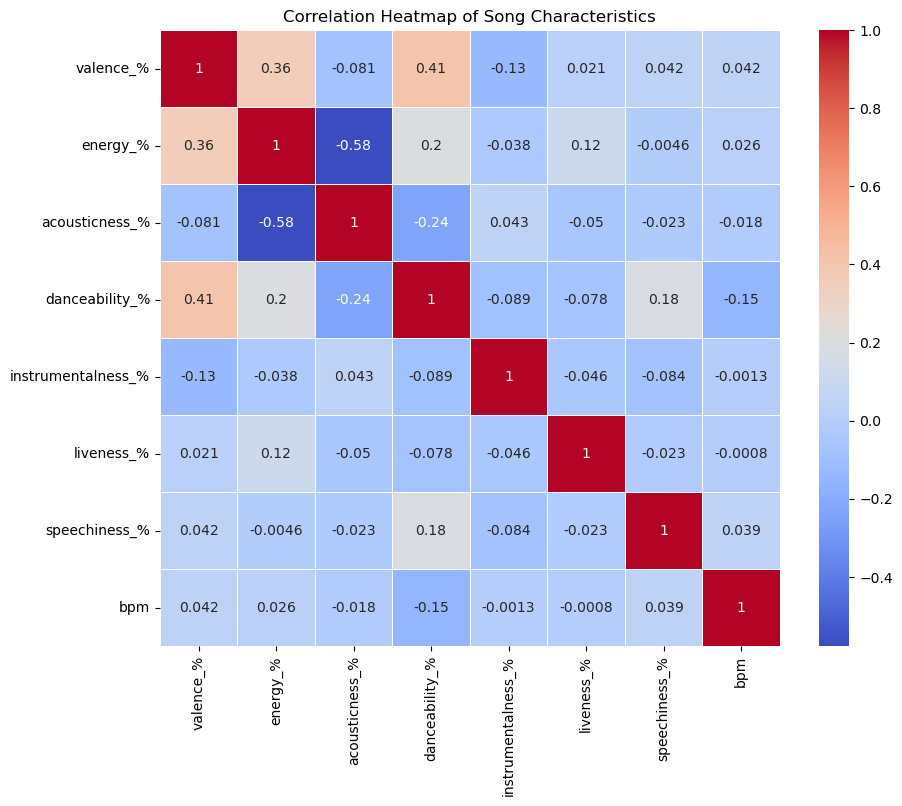

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns for the heatmap
features = df[['valence_%', 'energy_%', 'acousticness_%', 'danceability_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm']]

# Compute the correlation matrix
correlation_matrix = features.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Song Characteristics')
plt.show()


In [91]:
# Group songs by key and count the occurrences of each key
key_counts = df['key'].value_counts()

# Sort the keys by their frequency in descending order
key_counts = key_counts.sort_values(ascending=False)

# Print the top 5 most used keys
top_5_keys = key_counts.head(5)
print(top_5_keys)


C#    120
G      96
G#     91
F      89
D      81
Name: key, dtype: int64


In [92]:
# Group songs by mode (major or minor) and count the occurrences of each mode
mode_counts = df['mode'].value_counts()

# Print the mode with the highest count
most_used_mode = mode_counts.idxmax()
print(f"The most used mode in the top songs is: {most_used_mode}")


The most used mode in the top songs is: Major


In [93]:
# Combine the 'key' and 'mode' columns into a new 'key_mode' column
df['key_mode'] = df['key'].astype(str) + " " + df['mode']

# Sort the combinations by total streams in descending order
top_key_mode_songs = df['key_mode'].value_counts()

# Print the top streamed key_mode combinations
print(top_key_mode_songs.head())


nan Major    75
C# Major     73
D Major      66
G Major      66
G# Major     63
Name: key_mode, dtype: int64


Spring    280
Winter    269
Autumn    209
Summer    194
Name: season_released, dtype: int64


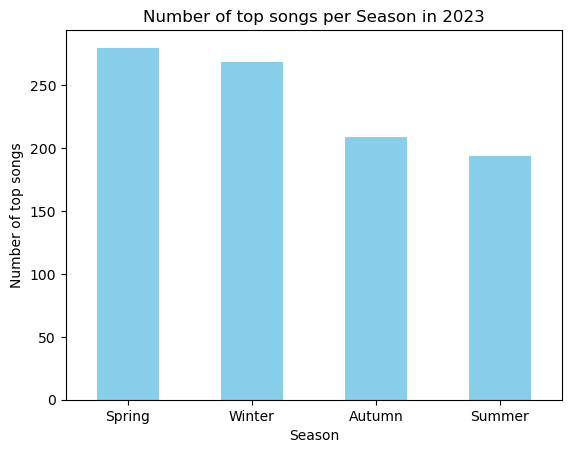

In [94]:
# Identify the most popular songs by season

# Create a new column for season
df['season_released'] = df['released_month'].apply(lambda x: 'Spring' if x in [3, 4, 5] else
                                       'Summer' if x in [6, 7, 8] else
                                       'Autumn' if x in [9, 10, 11] else
                                       'Winter')

# Count the number of songs in each season
season_counts = df['season_released'].value_counts()

# Print the top 10 most popular seasons
print(season_counts.head(10))

# Create a bar graph to show the number of streams for each season
season_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of top songs')
plt.title('Number of top songs per Season in 2023')
plt.xticks(rotation=0)  # Ensure season labels are not rotated
plt.show()

In [96]:
# Sort the DataFrame by 'streams' in descending order and take the top 10 rows
top_10_streamed_songs = df.sort_values(by='streams', ascending=False).head(10)

# Print the top 10 most streamed songs
print(top_10_streamed_songs[['track_name', 'artist(s)_name', 'streams', 'released_year', 'season_released']].to_string(index=False))


                                   track_name               artist(s)_name    streams  released_year season_released
                              Blinding Lights                   The Weeknd 3703895074           2019          Autumn
                                 Shape of You                   Ed Sheeran 3562543890           2017          Winter
                            Someone You Loved                Lewis Capaldi 2887241814           2018          Autumn
                                 Dance Monkey                  Tones and I 2864791672           2019          Spring
Sunflower - Spider-Man: Into the Spider-Verse        Post Malone, Swae Lee 2808096550           2018          Autumn
                                    One Dance          Drake, WizKid, Kyla 2713922350           2016          Spring
                    STAY (with Justin Bieber) Justin Bieber, The Kid Laroi 2665343922           2021          Summer
                                     Believer              Imagi